# 2024. Maximize the Confusion of an Exam

### Difficulty: <font color = orange> Medium </font>

---

A teacher is writing a test with `n` true/false questions, with `'T'` denoting `true` and `'F'` denoting `false`. He wants to confuse the students by maximizing the number of consecutive questions with the same answer (multiple trues or multiple falses in a row).

You are given a string `answerKey`, where `answerKey[i]` is the original answer to the `ith` question. In addition, you are given an integer `k`, the maximum number of times you may perform the following operation:

- Change the answer key for any question to `'T'` or `'F'` (i.e., set `answerKey[i]` to `'T'` or `'F'`).

Return *the maximum number of consecutive `'T'`s or `'F'`s in the answer key after performing the operation at most `k` times.*

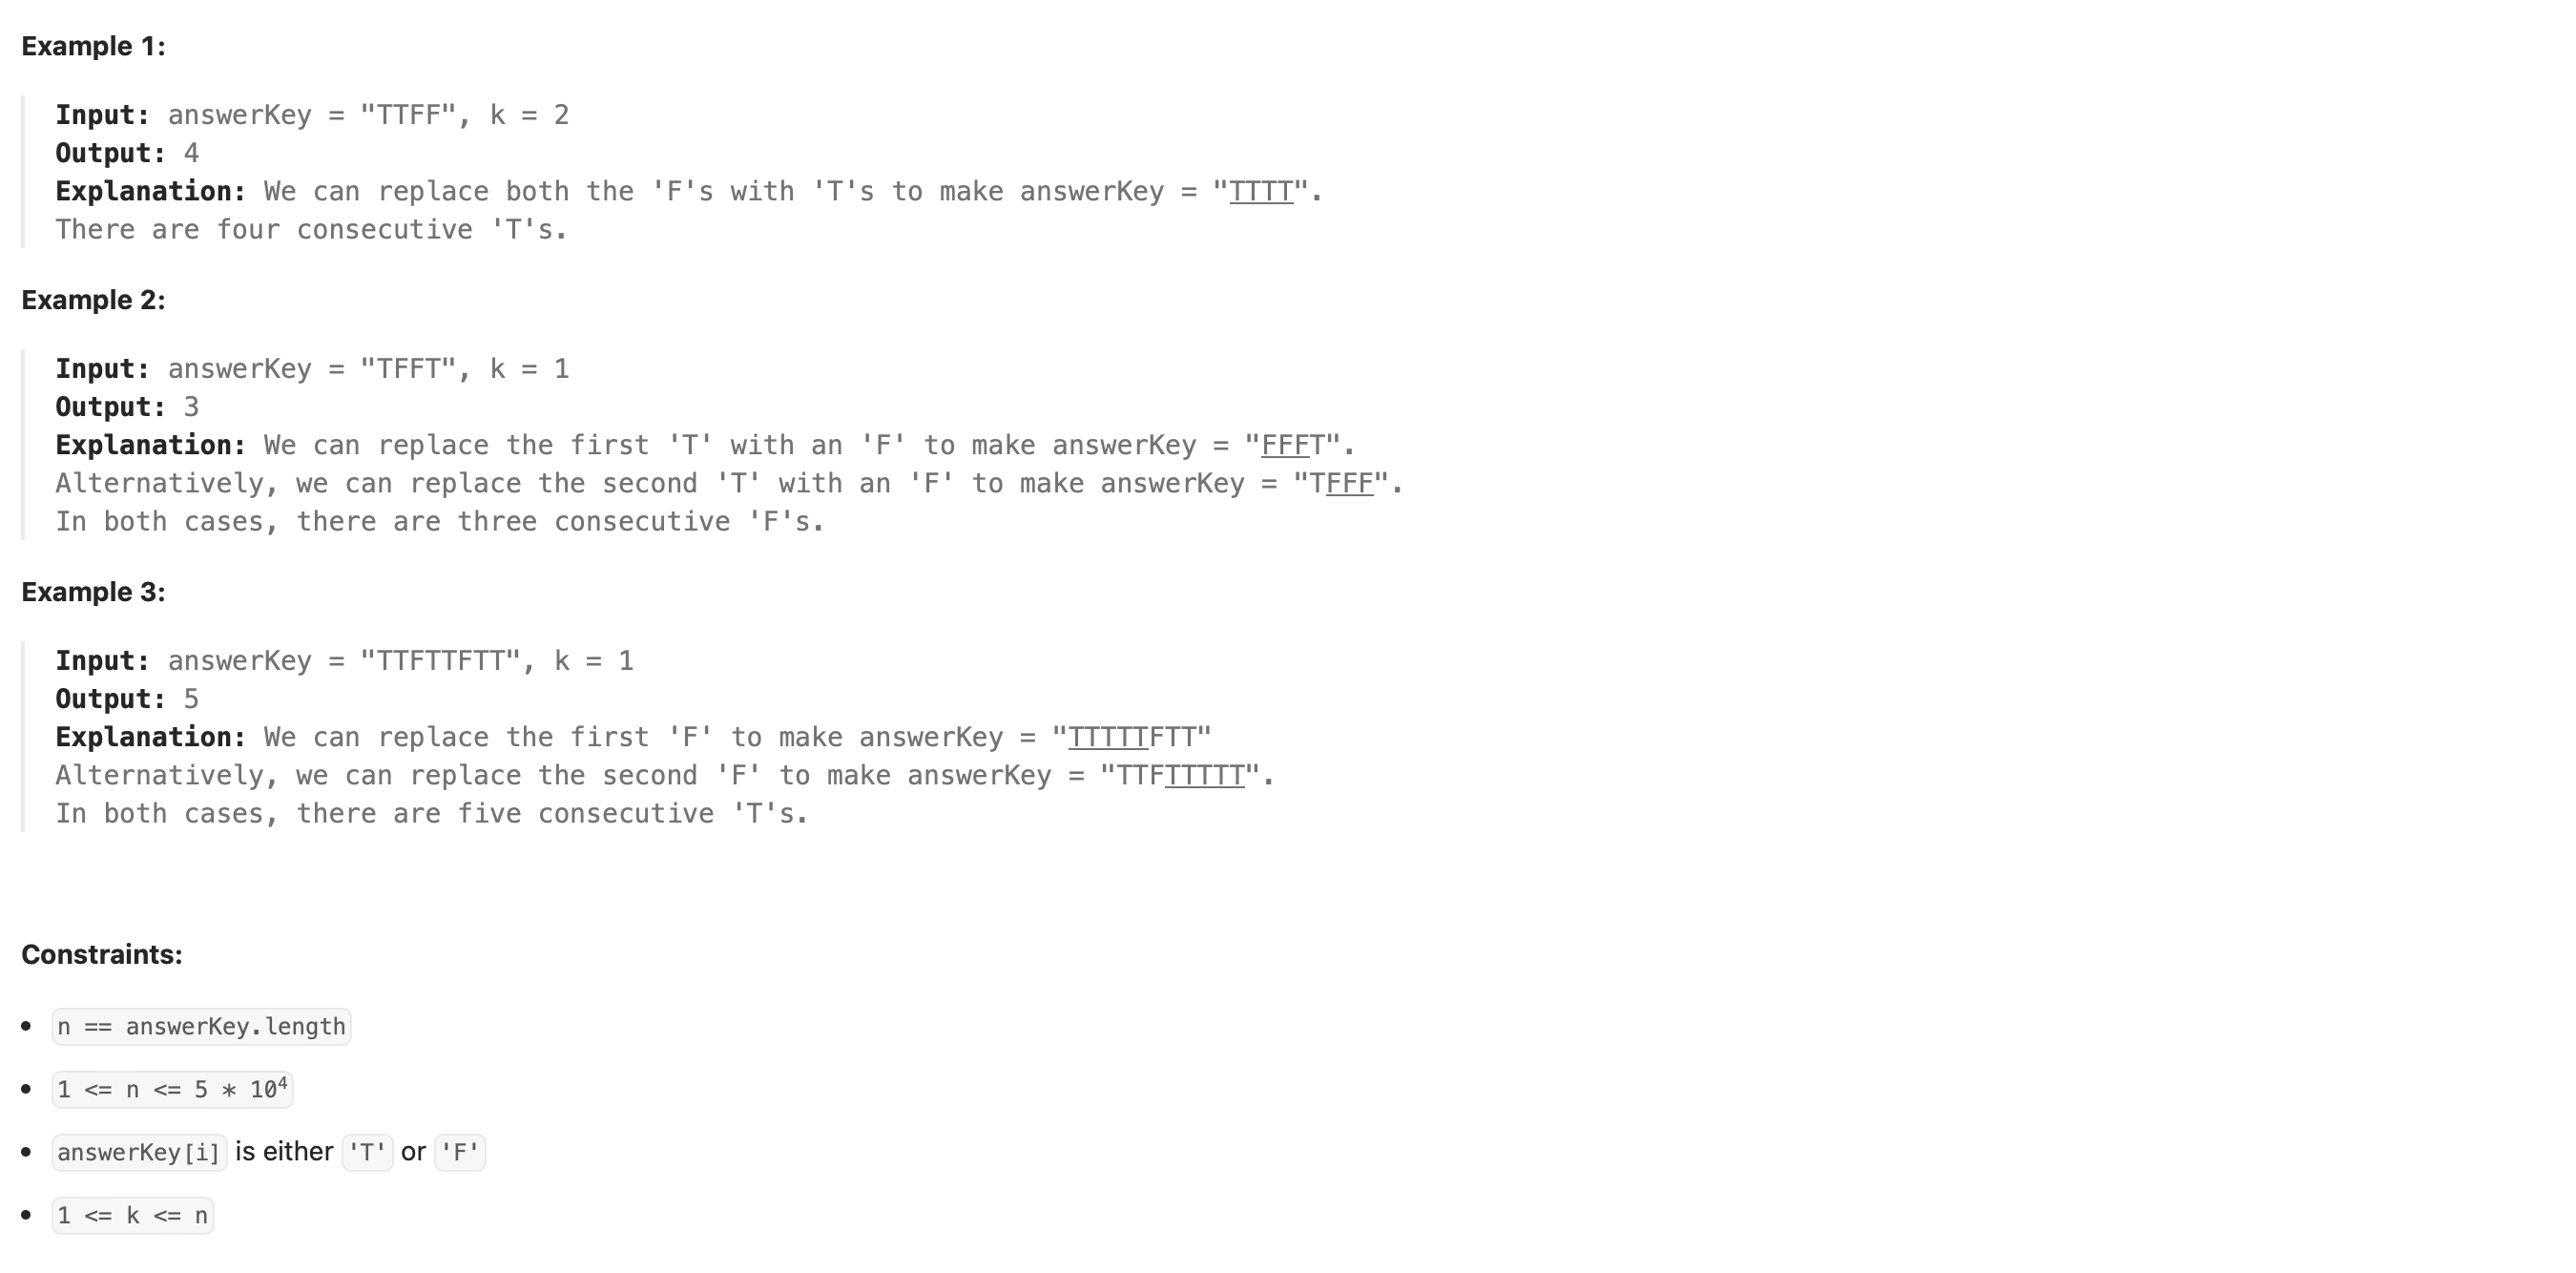

## Approach Overview:

Iterate through each answer in `answerKey` and use a sliding window technique to find the maximum number of consecutive answers we can make the same (the longest sequence of `'T's` or `'F's`). At each step, check if we can afford to make all the answers in the current window the same by flipping at most `k` answers. If the number of flips needed is less than or equal to `k`, the window is valid. If not, shrink the window from the left until it becomes valid.


## Detailed Explanation:

We are given a string called `answerKey` that contains the answers to (True or False) exam style questions. We have to try and confuse the students by maximizing the number of consecutive questions with the same answers. 

So we're trying to make it that `answerKey` has the maximum number of questions with the highest number of consecutive `'T's` or `'F's` as the answer. And we're instructed that we can change at most `k` answers on the `answerKey`. So we can't change / flip more than `k` answers.

Again we're given a string called answerKey containing 'T' and 'F' answers. 

And again, our goal is to maximize the number of consecutive questions with the same answer by flipping at most k answers.

Approach: 

We iterate through every answer in `answerKey` and using sliding window technique we find the maximum number of consecutive answers we can make the same (most number of `'T's` or `'F's` in a row we can make). 

At each iteration check if we can afford to make all the answers in the current `answerKey` window the same **(note: we can flip at most `k` answers in a window)**. 

If the number of answers we can flip (such that the window contains the same answer) is less than or equal to `k`, then we can afford the make the change and the window is valid. 

If we cannot afford to make all the answers the same (number of answers we'd need to flip is more than our budget / is more than we can afford / is more than `k`) then our window is invalid. So we need to shrink it until it becomes valid again. We do that by removing answers from the `answerKey` window starting from the left.


#### Window Validity Condition Explained More Simply:

Window Validity:

- At each step, check if we can make all answers in the current window the same by flipping at most k answers.


- If the number of flips needed (the difference between the window size and the count of the most frequent answer) is less than or equal to k, the window is valid.


- If the window is not valid (flips needed exceed k), shrink the window from the left until it becomes valid.

## Key Challenges:

No challenge, managed to solve it fully on my own :) 

## Solution:

In [ ]:
class Solution:
    def maxConsecutiveAnswers(self, answerKey: str, k: int) -> int:
        
        # Dictionary to store the count of "T" and "F" in current `answerKey` window
        characterCount = {}

        # Variable to store the maximum number of consecutive 'T' or 'F' in the answerKey 
        count = 0
        
        # Initialize the left pointer for the sliding window
        left = 0
        
        # iterate through every character / answer in `answerKey`
        for right in range(len(answerKey)):
            
            # calculate the count of the current answer ('T' or 'F') in the current answerKey window
            characterCount[answerKey[right]] = characterCount.get(answerKey[right], 0) + 1
            # check if answerKey window is invalid 
            # (window is invalid if we can't afford to make all the answers in it the same by flipping at most `k` answers)
            while (right - left + 1) - max(characterCount.values()) > k:
                
                # remove leftmost character / answer from answerKey window
                characterCount[answerKey[left]] -= 1
                
                # increment left pointer so we can slide answerKey window 
                left += 1

            # Update the count with the maximum number of consecutive answers in the current valid window
            count = max(count, right - left + 1)    
        
        # number of maximum number of consecutive questions with the same answer
        return count            